## 1. Load data from file

In [0]:
import numpy as np

DATA_PATH = './mnist_test.csv'
SIZE_ROW = 28
SIZE_COL = 28

# load data from file
data = np.genfromtxt(DATA_PATH, delimiter=',')

# separate pixel values from labels
X_data = data[:, 1:]
Y_data = data[:, 0].reshape(-1, 1)

## 2. Average Image for Each Digit

In [0]:
# extract mask for each label
X_masks = []
for digit in range(10):
  X_masks.append(np.squeeze(Y_data) == digit)

# average images for each label
X_avgs = []
for X_mask in X_masks:
  X_avgs.append(np.mean(X_data[X_mask], axis=0))

## 3. Forward Propagation with Random Weights

In [0]:
def neural_network(X):
  weights = np.random.randn(1, X.shape[1])
  y = np.matmul(X, weights.T)
  y = np.clip(y, -500, 500) # prevent exp overflow
  z = 1 / (1 + np.exp(-y))
  return z

output = neural_network(X_data)

# average outputs for each label
X_output_avgs = []
for X_mask in X_masks:
  X_output_avgs.append(np.mean(output[X_mask]))

## 4. Results

### 4-1. Plot the average image

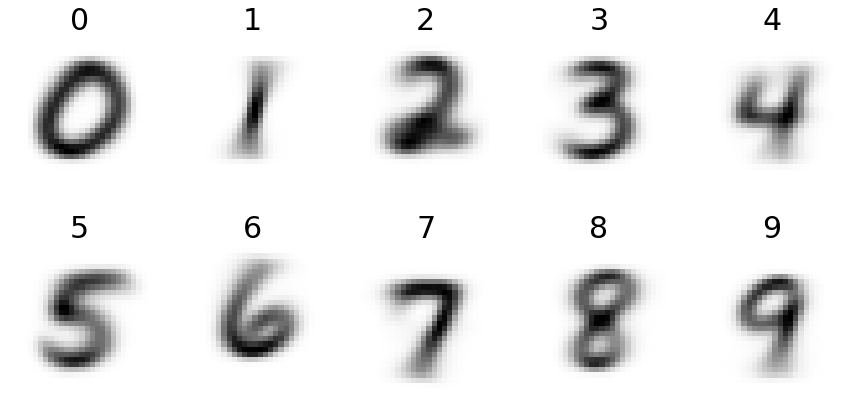

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

for digit, X_avg in enumerate(X_avgs):
  plt.subplot(2, 5, digit + 1)
  plt.title(digit, fontsize=30)
  plt.imshow(X_avg.reshape(SIZE_ROW, SIZE_COL), cmap='Greys', interpolation='None')
  plt.axis('off')

plt.show()

### 4-2. Present the output of the neural network with random weights

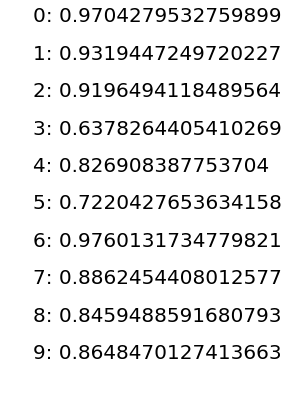

In [120]:
ax = plt.axes([0, 0, 0.3, 1.3])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

for digit, X_output_avg in enumerate(X_output_avgs):
  plt.text(0.2, 1.0 - digit/10, f'{digit}: {X_output_avg}', size=20, color='black')

plt.show()